#### Code to generate the data:
python -m grid --n 4 rc "python correlation.py --ref_seed 0 --eps 0.01 --N 500 --kernel laplace --sigma 100" --data_seed 0 1 2 3 4 5 6 7 8 9 --dataset:str interface stripe sphere --d 2 3 5 10 30 --p 50 85 144 243 411 696 1179 2000 3100 4640 6810 8000 10000

#### Figures for the paper

In [1]:
import os
import sys
sys.path.append("../")
import numpy as np
import utils

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('text', usetex=True)
rcParams['font.family'] = 'DejaVu Sans'
from matplotlib.patches import Patch 
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
import matplotlib.cm as cm

/home/jonas/local/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  del sys.path[0]


In [2]:
# load the data
name = "rc"

data = dict()
ds = utils.get_argument(name, "d")
datasets = utils.get_argument(name, "dataset")

for dataset in datasets:
    for d in ds:
        dic = {"dataset": dataset, "d": d}
        data_ = utils.get_rc(name, dic, chunk=1)
        data[dataset, d] = utils.class_data(data_, dic, "p")

<IPython.core.display.Javascript object>


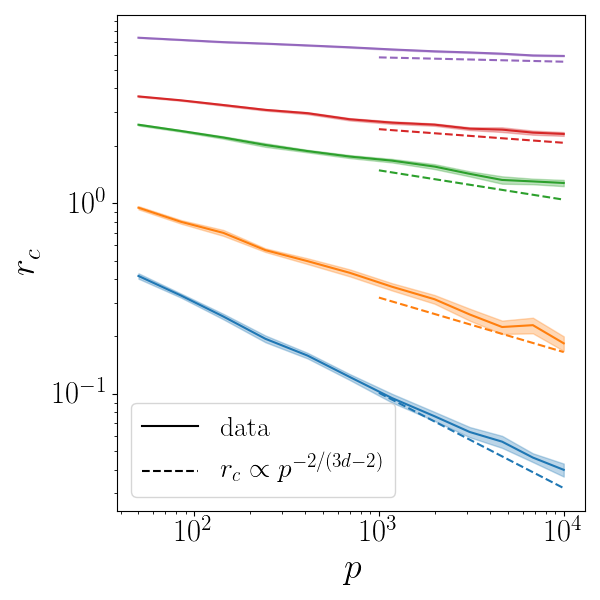

In [3]:
%matplotlib notebook

dataset = "stripe" # interface, stripe or sphere

label1 = [Line2D([0], [0], color='k', Linestyle='-', label=r"data"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$r_c \propto p^{-2 / (3d-2)}$")]
label2 = [Patch(facecolor="C{}".format(i), label=r"$d$={}".format(d)) for i, d in enumerate(ds)]
labels = label1 + label2

if dataset == "interface":
    pf = {2: 2.9, 3: 2.4, 5: 4.8, 10: 4.3, 30: 7}
if dataset == "stripe":
    pf = {2: 3.2, 3: 2.3, 5: 4.3, 10: 4., 30: 6.8}
if dataset == "sphere":
    pf = {2: 4.5, 3: 3.3, 5: 3.2, 10: 4.1, 30: 6.7}

fig, ax = plt.subplots(figsize=(6, 6))

for i, d in enumerate(ds):    
    ps, means = utils.get_mean(data[dataset, d])
    ps, stds = utils.get_std(data[dataset, d])
    ax.plot(ps, means, color="C{}".format(i))
    ax.fill_between(ps, means - stds / 2, means + stds / 2, color="C{}".format(i), alpha=0.3)
    # benchmark
    x = np.linspace(1e3, 1e4)
    y = pf[d] * x ** (-2 / (3 * d - 2))
    ax.plot(x, y, color="C{}".format(i), Linestyle='--')

ax.set_xlabel(r"$p$", fontsize=26)
ax.set_ylabel(r"$r_c$", fontsize=26)
ax.set(xscale='log', yscale='log')
ax.tick_params(labelsize=22)

plt.legend(handles=label1, loc="lower left", fontsize=20)
plt.tight_layout()
#plt.savefig("path_to_figure", format="pdf")

<IPython.core.display.Javascript object>


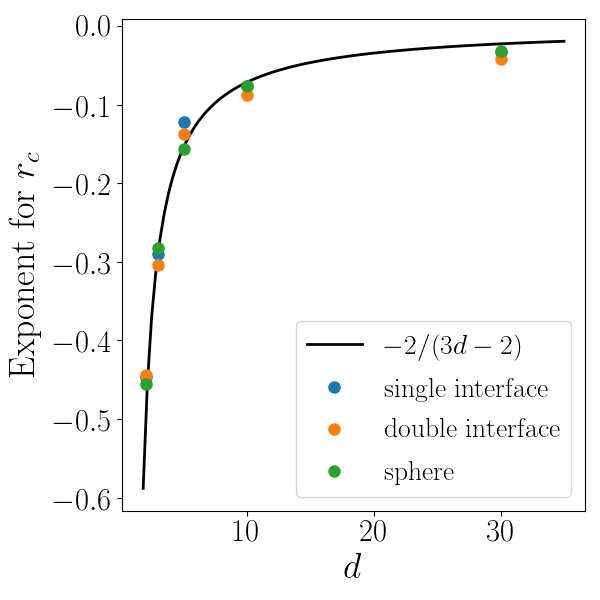

In [10]:
%matplotlib notebook

datasets = ["interface", "stripe", "sphere"]

beta = dict()
for dataset in datasets:
    beta[dataset] = list()
    for d in ds:
        ps, means = utils.get_mean(data[dataset, d])
        beta[dataset].append(np.polyfit(np.log10(ps), np.log10(means), 1)[0])

labels = [Line2D([0], [0], c='k', ls='-', lw=2, label=r"$-2/(3d-2)$"),
          Line2D([0], [0], c='C0', ls='None', marker='o', ms=8, label=r"single interface"),
          Line2D([0], [0], c='C1', ls='None', marker='o', ms=8, label=r"double interface"),
          Line2D([0], [0], c='C2', ls='None', marker='o', ms=8, label=r"sphere")]

fig, ax = plt.subplots(figsize=(6, 6))

#benchmark
x = np.linspace(1.8, 35, 100)
y = -2 / (3 * x - 2)
ax.plot(x, y, ls='-', lw=2, c='k')
#data
for i, dataset in enumerate(datasets):
    ax.plot(ds, beta[dataset], marker='o', ms=8, ls='None', c=r"C{}".format(i))

ax.set_xlabel(r"$d$", fontsize=26)
ax.set_ylabel(r"Exponent for $r_c$", fontsize=26)
ax.set(xscale='linear', yscale='linear')
ax.tick_params(labelsize=22)

plt.legend(handles=labels, loc="lower right", fontsize=20)
plt.tight_layout()
#plt.savefig("path_to_figure"), format="pdf")

<IPython.core.display.Javascript object>


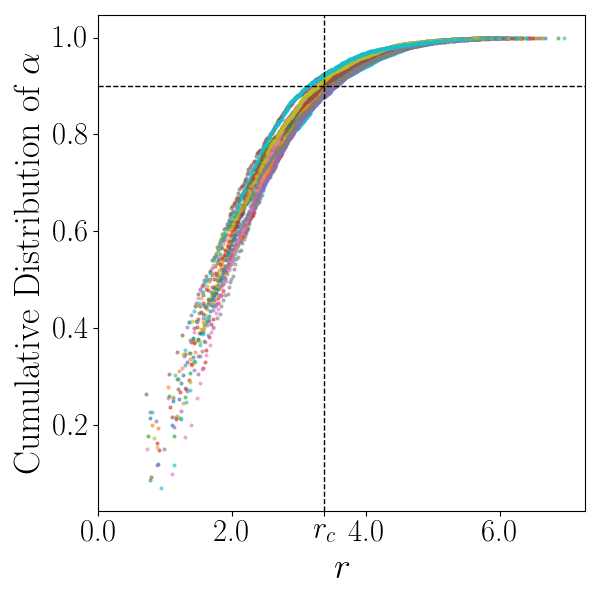

In [20]:
%matplotlib notebook

name = "rc"
dataset = "interface"
p = 6810
d = 5
dic = {"dataset": dataset, "p": p, "d": d}
seeds = utils.get_argument(name, "data_seed", dic)
r, dalpha = [], []
for seed in seeds:
    dic["data_seed"] = seed
    args, res = utils.load_data(name, dic)    
    r.append(res["r"])
    dalpha.append(np.abs(res["dalpha"]))

fig, ax = plt.subplots(figsize=(6, 6))

rstar = list()
for seed in seeds:
    _r, _dalpha = utils.sort_data(r[seed], dalpha[seed])
    _r, pdf, cdf = utils.get_distribution(_r, _dalpha, chunk=5)
    rstar.append(utils.get_rstar(_r, cdf, 0.9))
    ax.plot(_r, cdf, Linestyle='None', marker='.', ms=4, alpha=0.5)
ax.axvline(np.mean(rstar), color='k', Linestyle='--', lw=1)
ax.axhline(0.9, color='k', Linestyle='--', lw=1)


ax.set_xlabel(r"$r$", fontsize=26)
ax.set_ylabel(r"Cumulative Distribution of $\alpha$", fontsize=26)
ax.set(xscale='linear', yscale='linear')
xt = [0., 2., 4., 6.]
xt=np.append(xt, np.mean(rstar))
xtl=xt.tolist()
xtl[-1]="$r_c$"
ax.set_xticks(xt)
ax.set_xticklabels(xtl)
ax.tick_params(labelsize=22)

plt.tight_layout()
#plt.savefig("path_to_figure", format="pdf")